In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('./gdrive/My Drive/Colab Notebooks/growth_hackers')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


https://www.edwith.org/datait/lecture/53656/

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')

# 2) GH사가 광고를 첨부하고자 한다면, 어떤 영상에 하는 것이 좋을까요?
- 대다수의 고객이 27, 1110, 1995번 영상을 시청함
- 가능한 적은 비용으로 많은 광고 도달을 목표로 한다
- 광고비는 views에 비례한다
- 변수간의 관계에 집중


In [0]:
ted=pd.read_csv('ted.csv')

## Cosine 유사도

## views로 각 반응값들 나누기

In [0]:
ted.columns

Index(['video_num', 'duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring', 'tags', 'views'],
      dtype='object')

In [0]:
#먼저 views로 각 반응들 나눠서 비율 칼럼만들기
for i,col in enumerate(ted.columns):
  if i >= 3 and i <=16:
    ted[col] = ted[col]/ted['views']

In [0]:
ted.head(1)

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
0,1,1164,4553,0.000416,0.000097,0.000129,0.000069,0.000008,0.000005,0.000156,0.000224,0.000006,0.000227,0.000094,0.000025,0.000004,0.000528,"['children', 'creativity', 'culture', 'dance',...",47227110


In [0]:
#너무 작은 값이라서 스케일-> 어차피 다 동일한 값으로 나눠준거니까 다 같은 방식으로 스케일링

#  평균을 제거하고 데이터를 단위 분산으로 조정한다.
# 그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.

#아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 
#StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

In [0]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
for i,col in enumerate(ted.columns):
  if i>=3 and i<16:
    ted[col]=pd.DataFrame(data=Scaler.fit_transform(ted[col].values.reshape(-1,1)),columns=[col])

In [0]:
ted.head(1)

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
0,1,1164,4553,0.092192,0.014065,0.013456,0.022972,0.003207,0.001674,0.122758,0.189407,0.005181,0.095096,0.030458,0.052168,0.004458,0.000528,"['children', 'creativity', 'culture', 'dance',...",47227110


# 어떤 클러스터 방법을 쓸까?

In [0]:
! pip install mglearn

     |████████████████████████████████| 542kB 7.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=b4752c42c4a16cf58c82d6384a0cfd3a4dec8d46ead0112ab5cce9e469fd4e91
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
from sklearn.metrics.cluster import silhouette_score

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("Randomly : {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

NameError: ignored

# but 실루엣 계수를 전적으로 신뢰할 수 없음

# 계층적 군집방법?
https://blog.naver.com/samsjang/221019280298

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster. 

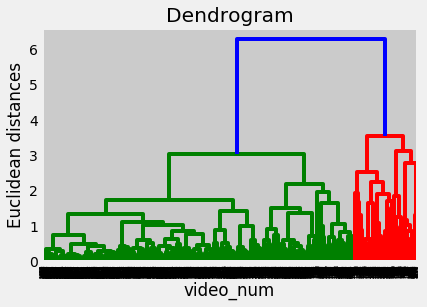

In [0]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, ward, linkage
from scipy.spatial.distance import pdist, squareform
X=ted.iloc[:,3:17]
linked=linkage(X, method='ward')
dendrogram=sch.dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('video_num')
plt.ylabel('Euclidean distances')
plt.show()

In [0]:
linked[0]

array([2.48600000e+03, 2.49700000e+03, 6.47225576e-03, 2.00000000e+00])

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

How do we determine the optimal number of clusters from this diagram? 

We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram.



# k means
http://hleecaster.com/ml-kmeans-clustering-concept/

https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/

https://bcho.tistory.com/1203

왜 kmeans  전에 정규화가 필요한지

https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering

https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering


# elbow method


In [0]:
from sklearn.cluster import KMeans
def inertia_func(n): #n for n clusters
  X=ted.iloc[:,3:17]
  model = KMeans(n_clusters=n, random_state=1237)
  model.fit(X)
  inertia=model.inertia_
  return inertia

In [0]:
a=[]
b=[]
for n in range(1,50):
  a.append(n)
  b.append(inertia_func(n))
iner = pd.DataFrame({'n' : a, 'in':b})

In [0]:
iner['zoom'] = iner['in']* 100

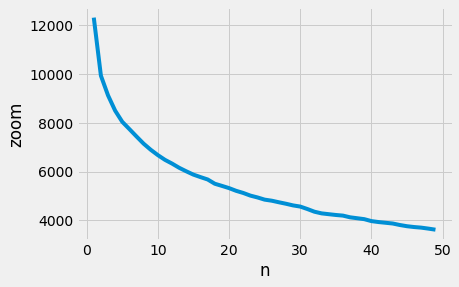

In [0]:
sns.lineplot(iner['n'], iner['zoom'])  #50까지 클러스터를 늘려도 꺾이는 지점이 안보임-> n=5로 결정 zoom/100 이 실제스케일

#silhouette method
 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타낸다.

1. 클러스터 안의 거리가 짧을 수록 좋고(cohesion), 다른 클러스터와의 거리는 멀수록 좋다(separation)

2. 실루엣은 -1 부터 1사이의 값을 가진다. (실루엣이 1일수록 잘 부합하는 거고, -1일수록 필요없는 데이터)

3. 높을 수록 좋다.

http://ros-developer.com/2017/12/04/silhouette-coefficient-finding-optimal-number-clusters/

Number Of Clusters:
2
Silhouette score value
0.4962107250068058
Number Of Clusters:
3
Silhouette score value
0.27757781815467764
Number Of Clusters:
4
Silhouette score value
0.2492821042376264
Number Of Clusters:
5
Silhouette score value
0.25093239305416953
Number Of Clusters:
6
Silhouette score value
0.22996459451141663
Number Of Clusters:
7
Silhouette score value
0.22251479471895727
Number Of Clusters:
8
Silhouette score value
0.2050237345787224
Number Of Clusters:
9
Silhouette score value
0.19056408904726801
Number Of Clusters:
10
Silhouette score value
0.1797310819910168
Number Of Clusters:
11
Silhouette score value
0.20724942823964285
Number Of Clusters:
12
Silhouette score value
0.19273058406496157
Number Of Clusters:
13
Silhouette score value
0.19081880647621746
Number Of Clusters:
14
Silhouette score value
0.19313735498640944
Number Of Clusters:
15
Silhouette score value
0.1867135940980579
Number Of Clusters:
16
Silhouette score value
0.16993029003347596
Number Of Clusters:
17


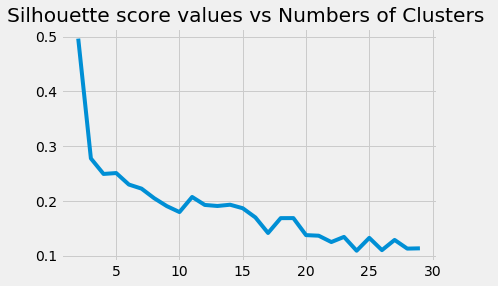

In [0]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

silhouette_score_values=list() 
NumberOfClusters=range(2,30)
 
for i in NumberOfClusters:
    X=ted.iloc[:,3:17]
    model=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=1237, copy_x=True)
    model.fit(X)
    labels= model.predict(X)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

In [0]:
#!pip install scikit-plot

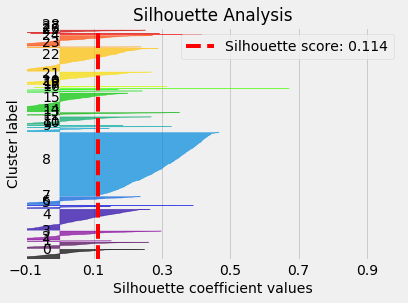

In [0]:
import scikitplot as skplt 
skplt.metrics.plot_silhouette(X, labels)

In [0]:
#n=5 clustering
X=ted.iloc[:,3:17]
model = KMeans(n_clusters=5,init='k-means++', random_state=1237)
model.fit(X)
ted['label']=pd.DataFrame(model.predict(X))

In [0]:
#http://hleecaster.com/k-means-clustering-concept/

In [0]:
#t=ted.drop(columns=['video_num','comments','duration','views','tags'])

In [0]:
len(t)

2550

In [0]:
def func(row): #row number 0~5
  global df
  df=t.iloc[row].T.reset_index()
  predict=df.iloc[-1,1]
  df=df.drop(14,0)
  df=df.rename(columns={'index':'reaction',df.columns[1]:'values'})
  df['label']=predict
  
  return df

In [0]:
result=pd.DataFrame()
for i in range(len(t)):
  result=pd.concat([result,func(i)])

In [0]:
result=result.reset_index()

In [0]:
result.groupby('label').count()

,index,reaction,values
label,,,
0.0,9394,9394,9394
1.0,21168,21168,21168
2.0,560,560,560
3.0,1582,1582,1582
4.0,2996,2996,2996


In [0]:
len(result)==14*2550

True

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45]), <a list of 11 Text yticklabel objects>)

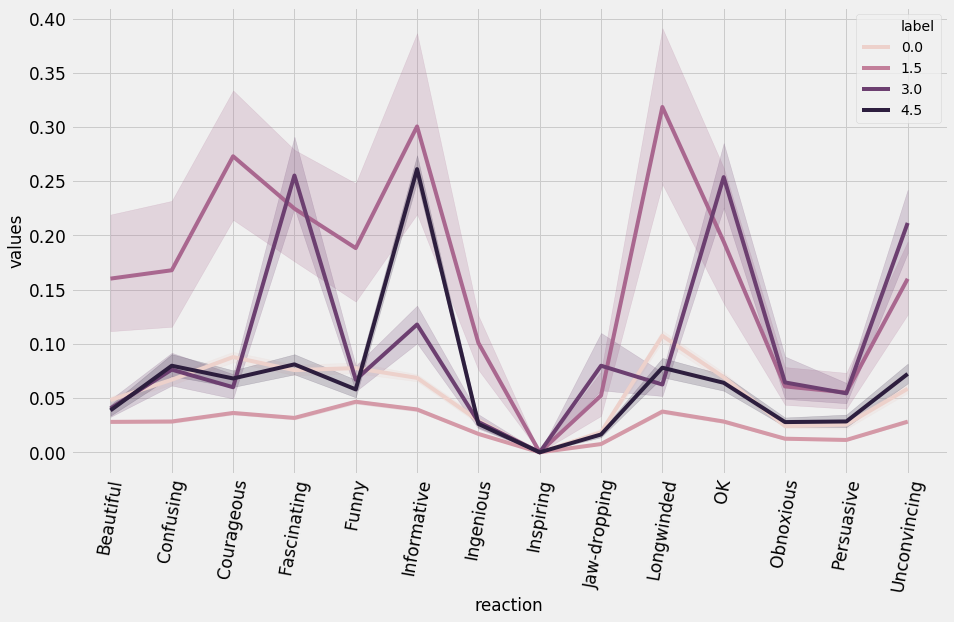

In [0]:
f,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='reaction', y='values',hue='label', data=result,ax=ax)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)
#ax.set_ylim(min(result['values']),max(result['values']))

In [0]:
result['label']=pd.to_numeric(result['label'],downcast='integer')

In [0]:
target=ted.loc[(ted['video_num']==27)|(ted['video_num']==1110)|(ted['video_num']==1995)]

In [0]:
target.head()#target 데이터의 라벨 확인하기

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views,label
26,27,1316,507,0.025376,0.005464,0.004545,0.048858,0.006125,0.012806,0.178777,0.197456,0.362053,0.047104,0.004604,0.266869,0.032461,0.000014,"['astronomy', 'biology', 'cognitive science', ...",2885999,3
1109,1110,548,161,0.073651,0.068423,0.064068,0.008167,0.001354,0.105819,0.127418,0.131050,0.022040,0.002326,0.001796,0.020356,0.005583,0.000002,"['DNA', 'TEDx', 'biology', 'biotech', 'compute...",1443353,1
1994,1995,1310,378,0.008183,0.019028,0.040496,0.070049,0.034366,0.012649,0.023585,0.027294,0.036970,0.008999,0.008524,0.146923,0.080716,0.000007,"['animals', 'biology', 'brain', 'cognitive sci...",2471075,1


In [0]:
tl=result.loc[(result['label']==1)|(result['label']==3)] 

In [0]:
ted.groupby('label').count()['video_num']   #각 클러스터 별로 몇개씩 분류되어있는지 확인

label
0     671
1    1512
2      40
3     113
4     214
Name: video_num, dtype: int64

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text yticklabel objects>)

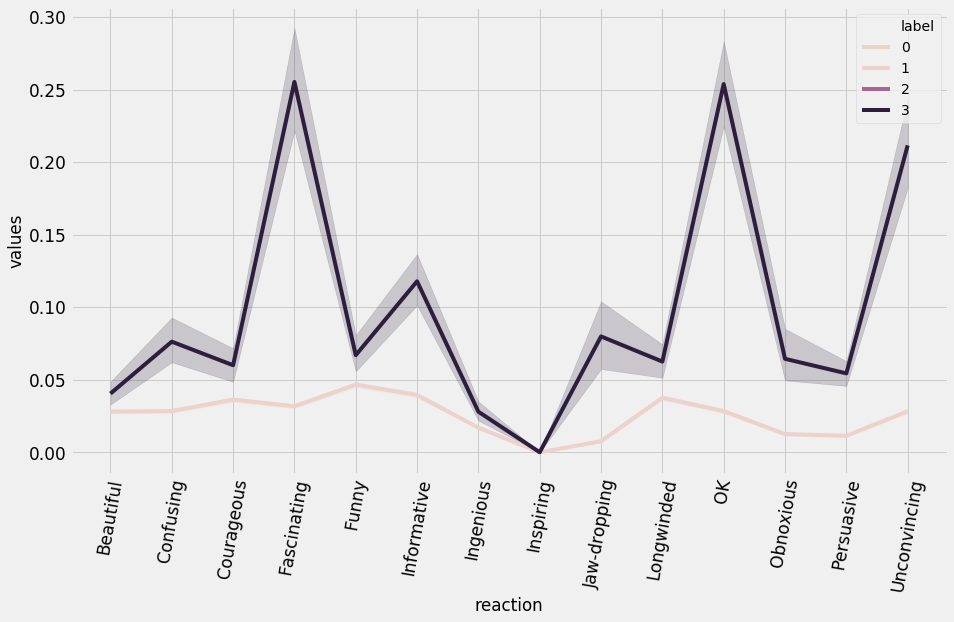

In [0]:
f,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='reaction', y='values',hue='label', data=tl,ax=ax)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=17)

0: 고만고만한 애들

3: fascinating + informative + OK + unconvincing
뭔가 호불호 갈리는 영상>

In [0]:
#라벨이 0,3인 애들의 태그를 보자

In [0]:
len(ted['tags'].loc[ted['label']==1])

1512

In [0]:
def freq_tag(label_num):    
  tag_label= tag_set(ted['tags'].loc[ted['label']==label_num])[0]  # 리스트에 저장
  key=[]
  value=[]
  for k,v in Counter(tag_label).items():
    key.append(k)
    value.append(v)
  key=pd.DataFrame(key, columns=['tag'])
  value=pd.DataFrame(value,columns=['등장횟수'])
  df=pd.concat([key,value], axis=1)
  df['label']=label_num
  df=df.sort_values(by='등장횟수', ascending=False).reset_index(drop=True)
  return df

In [0]:
freq_tag(3)

,tag,등장횟수,label
0,technology,37,3
1,culture,36,3
2,globalissues,33,3
3,science,31,3
4,design,24,3
...,...,...,...
214,leadership,1,3
215,healthcare,1,3
216,Bioethics,1,3
217,mining,1,3


1) 태그

In [0]:
import re
from collections import Counter
#ted['tags']=ted['tags'].apply(lambda x: re.sub('[\'\[\]]','',x))#.apply(lambda x:Counter(x.split(', ')))

In [0]:
def tag_set(x): #x<-ted['tags']
  tag_labels = list()
  for t in x: #list
      t=t.split(',')
      for s in t: 
        s=re.sub('[^A-Za-z]','',s)
        tag_labels.append(s)
  raw=tag_labels # with dupls
  tag_labels=list(set(tag_labels)) #w/o dupls
  return raw,tag_labels

In [0]:
#일단 예시로 든 3 비디오의 tag 특성을 찾아보자
target=ted.loc[(ted['video_num']==27) | (ted['video_num']==1110)| (ted['video_num']==1995)]
target=target[['video_num','Inspiring','Unconvincing','duration','views','tags']].reset_index()
target_tags=tag_set(target['tags'])[1]
raw=tag_set(target['tags'])[0]

In [0]:
ted['total_tag_num']=ted['tags'].apply(lambda row:sum(Counter((re.sub('[\'\[\]]','',row)).split(', ')).values()))

In [0]:
vn=[]
for tt in target_tags:
  for i in range(len(ted['tags'])):
    if tt in ted['tags'][i]:
      vn.append(ted['video_num'][i])  
vn=list(set(vn))

ted['how_many']=np.nan #target tag를 얼마나 가지고 있는 지, 개수

for j in range(len(ted['tags'])):
  cnt=0
  for tt in target_tags:
     if tt in ted['tags'][j]:
      cnt+=1
      ted['how_many'][j]=cnt
     
ted['tag_portion']=ted['how_many']/ted['total_tag_num'] ##target tag를 얼마나 가지고 있는 지, 비율
ted['tag_portion'].loc[ted['tag_portion']>1]=1                  #1보다 커지면 1로 한다

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
tag_label_0=ted.loc[ted['label']==0].sort_values(by='how_many', ascending=False)
#tag_label_0.groupby=('views').min()
#how many가 가장 많은 애부터 출력-> view가 가장 낮은애 출력

In [0]:
tag_label_0

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views,label,how_many,total_tag_num,tag_portion
1251,1252,1008,456,0.128017,0.022521,0.009501,0.133180,0.068115,0.315055,0.135767,0.013951,0.015200,0.020105,0.010007,0.037989,0.045051,0.000006,"['Autism spectrum disorder', 'Bioethics', 'DNA...",1878242,0,9.0,22,0.409091
516,517,1128,328,0.106425,0.006364,0.004264,0.014109,0.036743,0.254618,0.086553,0.034549,0.030829,0.024381,0.009033,0.012889,0.006187,0.000004,"['biology', 'brain', 'medicine', 'mental healt...",4233352,0,7.0,8,0.875000
1429,1430,680,312,0.035098,0.007176,0.003658,0.007436,0.127026,0.154320,0.104315,0.103080,0.023549,0.032677,0.015665,0.240936,0.000676,0.000023,"['DNA', 'TEDx', 'bacteria', 'biology', 'childr...",1489438,0,6.0,13,0.461538
536,537,890,343,0.010652,0.045938,0.016603,0.156045,0.123127,0.025589,0.031091,0.128789,0.061515,0.009244,0.035422,0.142262,0.023047,0.000005,"['brain', 'computers', 'consciousness', 'mind'...",1180127,0,6.0,7,0.857143
922,923,625,140,0.117224,0.109002,0.065731,0.095825,0.135118,0.049353,0.014234,0.028985,0.014183,0.005350,0.008639,0.155688,0.029192,0.000010,"['DNA', 'TEDx', 'alternative energy', 'biology...",862689,0,6.0,9,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,2299,601,83,0.037470,0.001348,0.001751,0.080363,0.122577,0.026281,0.136959,0.098963,0.017265,0.012549,0.022068,0.010622,0.008343,0.000016,"['communication', 'education', 'language', 'on...",2173228,0,NaN,7,NaN
2321,2322,888,121,0.115308,0.114452,0.021659,0.018879,0.261892,0.010617,0.072228,0.122650,0.023562,0.002495,0.002753,0.137290,0.014549,0.000009,"['Islam', 'activism', 'community', 'death', 'f...",1177013,0,NaN,10,NaN
2351,2352,987,240,0.058987,0.015033,0.058154,0.009220,0.101101,0.101861,0.052824,0.025235,0.071592,0.011358,0.011961,0.034429,0.014873,0.000011,"['communication', 'community', 'faith', 'human...",1219102,0,NaN,13,NaN
2361,2362,766,31,0.012130,0.063557,0.011482,0.056697,0.071474,0.002822,0.084486,0.103700,0.142935,0.002561,0.007063,0.012807,0.052693,0.000017,"['Africa', 'Internet', 'activism', 'collaborat...",1147037,0,NaN,18,NaN
